**MiniProject1
Name: Alon Hillel
ID: 213406945**

Import the libraries and the datasetImport the libraries and the dataset:

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title, xticks

df = pd.read_csv('laptop_price - dataset.csv')
print(df)
print(df.info())

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

                           

Plot the price of all the laptops

In [ ]:
sns.histplot(df['Price (Euro)'], kde=True,stat='percent', binwidth=500,).set(title='Histogram of Price (Euro)');

Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [ ]:
result = df.groupby('Company')['Price (Euro)'].mean().reset_index().sort_values('Price (Euro)')
ax = sns.barplot(df, x='Company', y='Price (Euro)',estimator="mean",order=result['Company'], errorbar=None)
ax.tick_params(axis='x', rotation=60,)
ax.bar_label(ax.containers[0], fontsize=10,rotation=90)
ax.set_ylabel('Average Price (Euro)')
ax.set_title('Laptop average price of each Company')
result

Find the different types of Operating systems present in the data - under the column name "OpSys"
* Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

In [ ]:
print(f"Operating Systems types: {df["OpSys"].unique()}")

#MacOS, mac OS X => Mac OS
df['OpSys'].replace(['macOS', 'Mac OS X'], 'Mac OS', inplace=True)

#Windows 10, Windows 10 S, Windows 7 => Windows
df['OpSys'].replace(['Windows 10', 'Windows 10 S', 'Windows 7'], 'Windows', inplace=True)

#No OS, Linux, Android and Chrome OS will not change

print(f"Operating Systems types after fixation: {df["OpSys"].unique()}")

Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

In [ ]:
for OS in df['OpSys'].unique().tolist():
    df1 = df[df['OpSys'] == OS]
    sns.displot(df1, x="Price (Euro)",stat='count').set(title=f"Distribution of Price of '{OS}'")

What is the relationship between RAM and computer price? add an adequate plot to support your findings.
<<< check data for outliers, what would be considered as an outlier? How will you detect it ? >>>

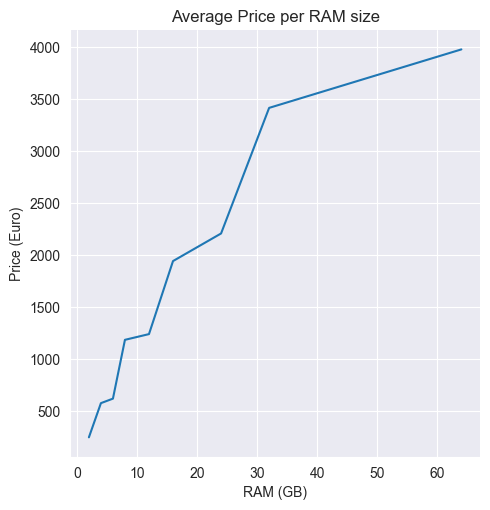

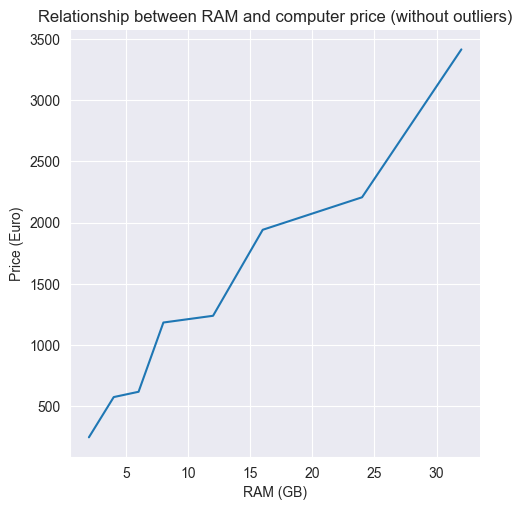

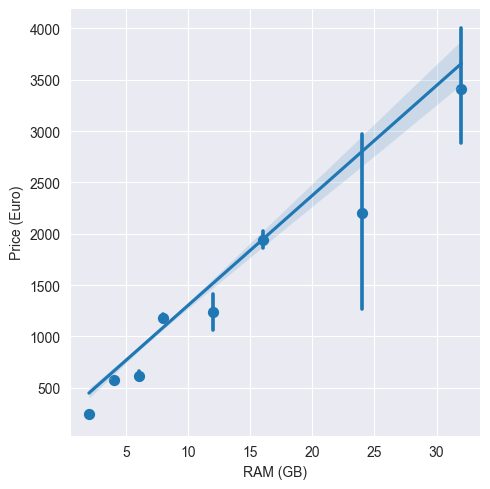

In [246]:
ram_sizes = df['RAM (GB)'].unique()
#sns.lmplot(x="RAM (GB)", y="Price (Euro)", data=df,x_bins=ram_sizes);
ax = sns.relplot(data=df, kind="line", x="RAM (GB)", y="Price (Euro)", errorbar=None,).set(title="Average Price per RAM size")

df2 = df[df['RAM (GB)'] != 64]
ax2 = sns.relplot(data=df2, kind="line", x="RAM (GB)", y="Price (Euro)", errorbar=None,).set(title="Relationship between RAM and computer price (without outliers)")

#ax.set(xticks=ram_sizes)

sns.lmplot(x="RAM (GB)", y="Price (Euro)", data=df2, x_estimator=np.mean);


